In [1]:
import scipy.io.wavfile as wav
import numpy as np
import matplotlib.pyplot as plt

rate, data = wav.read('jolene2.wav')

#wav length
print('rate: '+str(rate))
print('data: '+str(data))
print('wav length: ' + str(data.shape[0] / rate))

#wav number of channels mono/stereo
data.shape[1]
#if stereo grab both channels
channel1=data[:,0] #left
channel2=data[:,1] #right

#averaging the channels damages the music
mono=np.sum(data.astype(float), axis=1)/2
# wav.write("jolene3.wav", rate, mono)

#Energy of music
energy = np.sum(channel1.astype(float)**2)
print('Energy of music: ' + str(energy))

#power - energy per unit of time
power = 1.0/(2*(channel1.size)+1)*np.sum(channel1.astype(float)**2)/rate
print('Power: '+str(power))

#create a time variable in seconds
time = np.arange(0, float(data.shape[0]), 1) / rate
print('time: '+str(time))

rate: 44100
data: [[ 0  0]
 [ 1  1]
 [-2 -2]
 ..., 
 [ 1  0]
 [-1 -1]
 [ 1  0]]
wav length: 161.33224489795919
Energy of music: 2.72024802261e+14
Power: 433.49103592
time: [  0.00000000e+00   2.26757370e-05   4.53514739e-05 ...,   1.61332177e+02
   1.61332200e+02   1.61332222e+02]


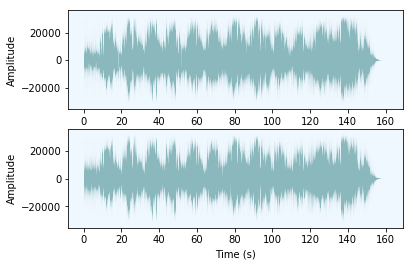

In [2]:
#plot amplitude (or loudness) over time
fig=plt.figure(1)
ax=plt.subplot(211, facecolor='aliceblue')
plt.plot(time, channel1, linewidth=0.01, alpha=0.7, color='#5F9EA0')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
ax=plt.subplot(212, facecolor='aliceblue')
plt.plot(time, channel2, linewidth=0.01, alpha=0.7, color='#5F9EA0')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.savefig('amp.png', facecolor=fig.get_facecolor())
plt.show()

C:\Users\zoshihyang\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


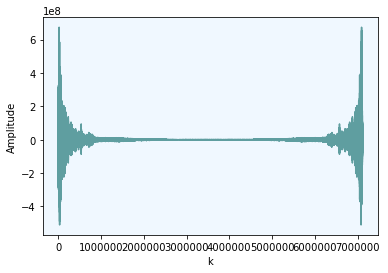

In [3]:
#Fourier transforms on the left channel

from numpy import fft as fft
fourier=fft.fft(channel1)
fig=plt.figure()
ax=plt.subplot(facecolor='aliceblue')
plt.plot(fourier, color='#5F9EA0')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.savefig('fou.png', facecolor=fig.get_facecolor())
plt.show()

#calculating frequency with the first half of the result
n = len(channel1)
fourier = fourier[int(0):int((n/2))]
fourier = fourier / float(n)

C:\Users\zoshihyang\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


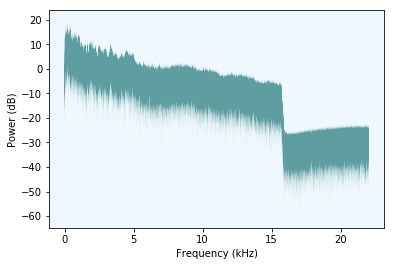

In [4]:
#frequency at each point
frequencyarray = np.arange(0, (n/2), 1.0) * (rate*1.0/n);
fig=plt.figure()
ax=plt.subplot(facecolor='aliceblue')
plt.plot(frequencyarray/1000, 10*np.log10(fourier), color='#5F9EA0', linewidth=0.02)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')
plt.savefig('calfreq.png', facecolor=fig.get_facecolor())
plt.show()

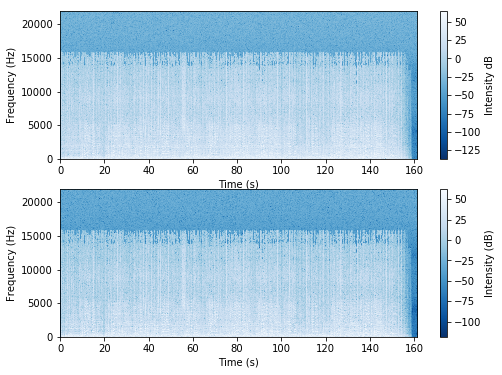

In [5]:
#spectrogram

fig=plt.figure(2, figsize=(8,6))
ax=plt.subplot(211, facecolor='aliceblue')
Pxx, freqs, bins, im = plt.specgram(channel1, Fs=rate, NFFT=1024, cmap=plt.get_cmap('Blues_r'))
cbar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity dB')
plt.subplot(212)
Pxx, freqs, bins, im = plt.specgram(channel2, Fs=rate, NFFT=1024, cmap=plt.get_cmap('Blues_r'))
cbar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity (dB)')
plt.savefig('spec.png', facecolor=fig.get_facecolor())
plt.show()

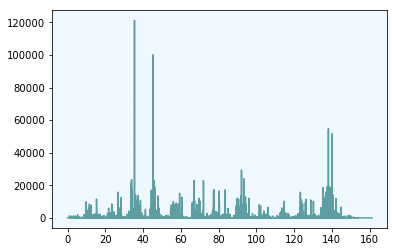

In [6]:
#close examination of frequency
np.where(freqs==2500)
MHZ10=Pxx[100,:]
fig=plt.figure()
ax=plt.subplot(facecolor='aliceblue')
plt.plot(bins, MHZ10, color='#5F9EA0')
plt.savefig('freq.png', facecolor=fig.get_facecolor())
plt.show()